In [1]:
import os
import time

import numpy as np
import ipyvolume as ipv
from pathlib import Path

from tyssue import Sheet, config
from tyssue.io import hdf5
from tyssue.draw.ipv_draw import view_ipv
from tyssue.draw.ipv_draw import sheet_view as ipv_sheet_view
from tyssue.core.sheet import get_opposite
from tyssue.draw.plt_draw import quick_edge_draw,sheet_view

from invagination.toolbox import open_sheet

import matplotlib.pyplot as plt
%matplotlib inline

SIM_DIR = Path('/home/admin-suz/Documents/SimulationsReview/2018-09-06_TEST2/')
#SIM_DIR = Path('/media/admin-suz/Sophie/SimulationsReview/2018-08-20_TEST0')
#SIM_DIR = Path('/media/admin-suz/Sophie/2018/datas/Simulations/2018-05-29_principal_results/')

old = None

In [4]:
import datetime
today = datetime.date.today()
dirname = SIM_DIR/f'{today.isoformat()}'


dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_1/'

## 3D view

In [3]:
import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0050.hf5'
ipv.clear()
ipv.style.use('dark')



dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)


mean_area = sheet.face_df[~sheet.face_df['is_mesoderm']].area.mean()
rel_area = (sheet.face_df['area'] / mean_area)

face_spec = {'color': rel_area, 
             'color_range': (0, 2),
             'visible': True,
             'epsilon': 0.1}
fig, meshes = ipv_sheet_view(sheet, mode='3D', face=face_spec)


fig.anglex = -0.7
fig.angley = 0.2
fig.anglez = 0.8
ipv.show()


VBox(children=(Figure(anglex=-0.7, angley=0.2, anglez=0.8, camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[11775, 11852],
       [11308, 11625],
       [ 7592,  7593],
       ...,
       [ 4912,  4910],
       [ 8955,  8961],
       [    0,  1365]], dtype=uint32), texture=None, x=array([-32.53341011, -44.15085082,  -2.73540499, ...,  -3.6268105 ,
        -3.41550686,  -3.59426975]), y=array([-57.84786657,  55.36517856, -67.22639899, ...,  50.35927474,
        47.9234633 ,  47.77652638]), z=array([ 94.09116851, -83.43381889,  92.04994412, ..., -92.31964735,
       -92.23415983, -92.16480987])), Mesh(color=array([[0.131172, 0.555899, 0.552459],
       [0.141935, 0.526453, 0.555991],
       [0.128729, 0.563265, 0.551229],
       ...,
       [0.120565, 0.596422, 0.543611],
       [0.122606, 0.585371, 0.546557],
       [0.131172, 0.555899, 0.552459]]), texture=None, triangles=array([[ 5795,  5947, 41617],
       [ 5810,  5948, 41618],
       [ 4723,  5949, 41619],
       ...,
       [ 3649, 41614, 77284],
       [ 1467, 41615, 77285],
       [    0, 41616, 77286]], dtype=uint32), x=array([-33.37681108, -34.0290151 , -29.79569026, ...,  83.05248439,
       -36.47670272, -34.75953754]), y=array([-58.94528901, -55.79204386, -58.4714107 , ...,   7.87595304,
       -61.89391876, -57.08051393]), z=array([ 90.87849824,  96.15034404,  95.55384785, ..., -30.42622352,
       -80.63445731,  93.03489075]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516]),))

In [66]:
import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0100.hf5'
ipv.clear()
ipv.style.use('dark')



dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']!=0].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()

sheet = sheet.extract_bounding_box(x_boundary=(-50,200), y_boundary=(-50,200))


"""mean_area = sheet.face_df[~sheet.face_df['is_mesoderm']].area.mean()
rel_area = (sheet.face_df['area'] / mean_area)"""

mean_area = sheet.face_df.height.mean()
rel_area = 1/(sheet.face_df['height'] / mean_area)

mean_edge = sheet.edge_df.cell.mean()
rel_edge = (sheet.edge_df['cell'] / mean_edge)

face_spec = {'color': rel_area, 
             'color_range': (0.8, 1.8),
             'visible': True,
             'epsilon': 0.1,
            'colormap':'Greens'}

edge_spec = {'color':rel_edge,
            'visible':True,
            'espilon':0.1,
            'colormap':'magma'
            }

fig, meshes = ipv_sheet_view(sheet, mode='3D', face=face_spec, edge=edge_spec)


fig.anglex = -1.3
fig.angley = 0.7
fig.anglez = 0.7
ipv.show()


/home/admin-suz/anaconda3/lib/python3.6/site-packages/tyssue-0.2.2-py3.6.egg/tyssue/draw/ipv_draw.py:166: RuntimeWarning: invalid value encountered in reduce
  if color_.ptp() < 1e-10:
/home/admin-suz/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/admin-suz/anaconda3/lib/python3.6/site-packages/tyssue-0.2.2-py3.6.egg/tyssue/draw/ipv_draw.py:170: RuntimeWarning: invalid value encountered in reduce
  return cmap((color_ - color_.min())/color_.ptp())
/home/admin-suz/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


VBox(children=(Figure(anglex=-1.3, angley=0.7, anglez=0.7, camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       ...,
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866]]), lines=array([[    0,  2363],
       [    1,    64],
       [    2,   212],
       ...,
       [11889,  2169],
       [11888, 11889],
       [11875, 11888]], dtype=uint32), texture=None, x=array([ 43.01515958, -17.02175506,  -2.01071092, ...,  83.46720634,
        82.49788257,  81.74682548]), y=array([22.64375943, 71.63030991, 56.04087694, ...,  8.9323837 ,
       10.64057791, 13.26952362]), z=array([123.21437028, -36.61701593,  21.54208052, ..., -25.84371596,
       -32.58645961, -35.37517914])), Mesh(color=array([[0.91769319, 0.96842753, 0.90136101],
       [0.91769319, 0.96842753, 0.90136101],
       [0.91326413, 0.96670511, 0.89619377],
       ...,
       [0.91769319, 0.96842753, 0.90136101],
       [0.91769319, 0.96842753, 0.90136101],
       [0.91769319, 0.96842753, 0.90136101]]), texture=None, triangles=array([[ 3613,  3714, 25995],
       [ 3626,  3715, 25996],
       [ 2878,  3716, 25997],
       ...,
       [ 2187, 25992, 48273],
       [ 2187, 25993, 48274],
       [ 2187, 25994, 48275]], dtype=uint32), x=array([-36.17391492, -38.97115634, -33.361111  , ...,  81.17796594,
        81.75814003,  82.43409141]), y=array([61.6582189 , 61.96857442, 64.34912861, ..., 16.83149949,
       13.391722  , 11.02567087]), z=array([-81.30594882, -76.48107396, -77.0378039 , ..., -34.65956517,
       -35.0908597 , -32.58101212]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516]),))

In [28]:
min(rel_area)

0.9155822453150325

In [98]:
"""sheet.face_df
def define_depth_by_cells(directory, t):
    
    # open sheet for depth reference
    sheet = open_sheet(directory, 0)
    try:
        sheet_mesoderm = sheet.extract('is_mesoderm')
    except:
        sheet_mesoderm = sheet.extract('is_fold_patch')
        
    
"""
sheet.face_df[sheet.face_df['is_mesoderm']]
    

,z,x,num_sides,area,perimeter,is_alive,y,face_o,height,rho,contractility,prefered_area,area_elasticity,prefered_height,prefered_vol,is_mesoderm,is_relaxation,id,enter_in_process
face,,,,,,,,,,,,,,,,,,,
19,111.446339,-1.441714,6,2.980913,9.074242,True,35.971643,45,34.195425,36.001523,7.211916,28.0,1,32,896,True,False,45,0
20,114.522037,-0.852764,6,3.824002,9.456428,True,34.769438,46,34.980423,34.782340,6.989308,28.0,1,32,896,True,False,46,0
21,115.729089,-1.598498,7,3.761011,9.537902,True,34.958811,47,36.018468,34.996934,8.587507,28.0,1,32,896,True,False,47,0
22,110.437931,-0.692455,6,3.976878,9.476543,True,35.786139,48,33.358075,35.795562,6.899640,28.0,1,32,896,True,False,48,0
23,115.898047,0.707622,6,4.052999,9.998419,True,34.255414,49,35.404486,34.265967,7.576788,28.0,1,32,896,True,False,49,0
24,111.308264,0.971993,7,3.719628,9.475014,True,35.351697,50,33.475808,35.367498,8.611468,28.0,1,32,896,True,False,50,0
25,114.440275,1.531326,6,3.071535,8.981467,True,34.890233,51,35.066940,34.926078,6.341560,28.0,1,32,896,True,False,51,0
26,107.295759,1.500639,7,4.545691,9.597618,True,36.531136,52,32.241430,36.563331,7.947460,28.0,1,32,896,True,False,52,0
27,107.628715,0.869239,5,1.927422,7.519210,True,36.092414,53,31.973069,36.104959,5.503148,28.0,1,32,896,True,False,53,0


## Ventral view of cells at the beginning

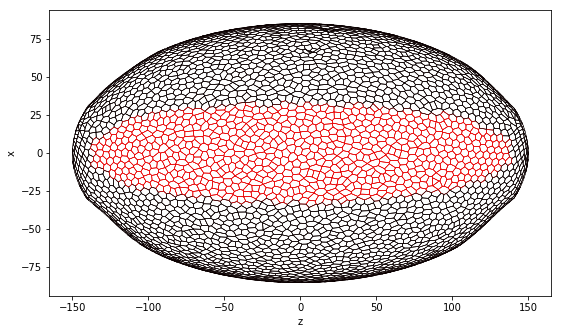

In [4]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 1)
sheet = sheet.extract_bounding_box(y_boundary=[0, 100])
fig, ax = plt.subplots()
edge_mask = 'is_mesoderm'
edge_mask_color_map='hot'
coords=['z', 'x']

list_edge_in_mesoderm = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df[edge_mask]].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_edge_in_mesoderm/4
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))/4

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 4)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 0.7
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.axis('off')

In [127]:
sheet.vert_df[(sheet.vert_df.z>-15) & (sheet.vert_df.z<15)]['radial_tension'].unique()

array([0.])

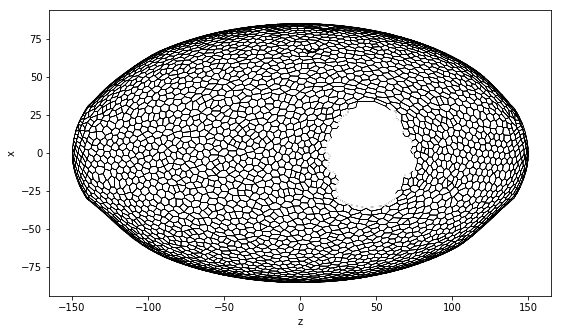

In [13]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 4)
sheet = sheet.extract_bounding_box(y_boundary=[0, 100])
fig, ax = plt.subplots()
edge_mask_color_map='gist_gray'
coords=['z', 'x']

list_cutting_edge = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df['contractility']==0].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_cutting_edge
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 2)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 1
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.axis('off')
#fig.savefig('../post_ablation.png', dpi = 150)

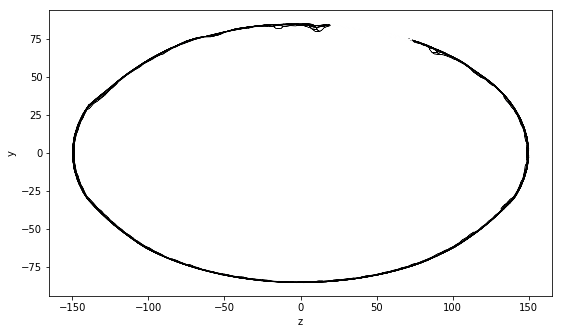

In [14]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 2)
sheet = sheet.extract_bounding_box(x_boundary=[-10, 10])
fig, ax = plt.subplots()
edge_mask_color_map='gist_gray'
coords=['z', 'y']

list_cutting_edge = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df['contractility']==0].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_cutting_edge
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 2)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 1
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

#ax.axis('off')
#fig.savefig('../post_ablation.png', dpi = 150)

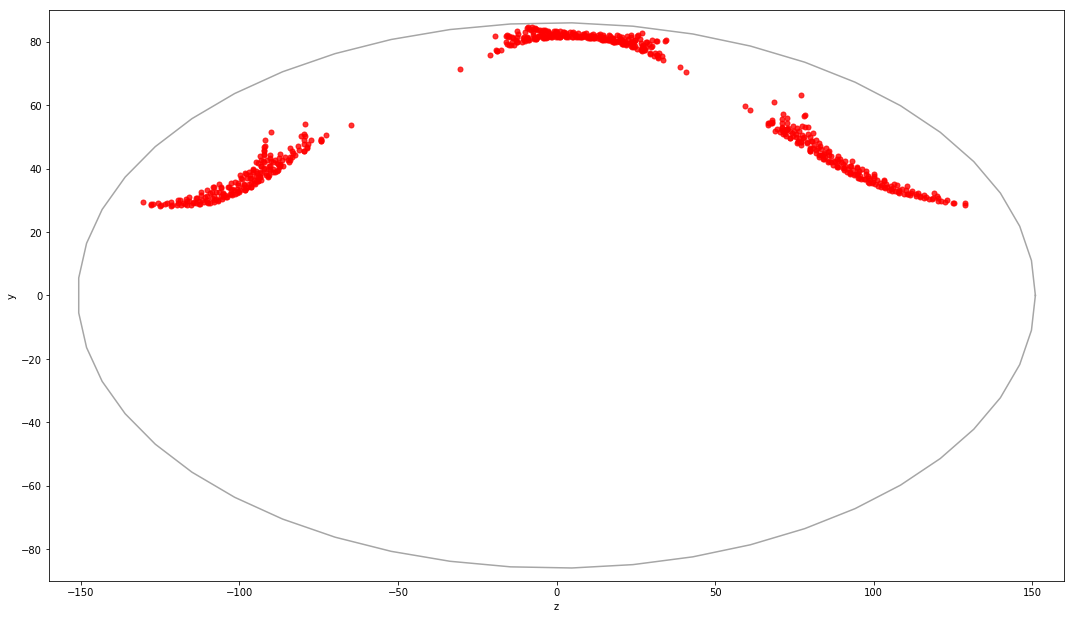

In [27]:
import matplotlib.gridspec as gridspec
SIM_DIR = Path('/media/admin-suz/Sophie/SimulationsReview/2018-08-22_TEST5')
dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_15/'
sheet = open_sheet(dirname, 50)
sheet_mesoderm = sheet.extract('is_mesoderm')

sheet_mesoderm = sheet.face_df[(sheet.face_df['contractility']!=0) & 
                              (sheet.face_df['is_mesoderm'])]


edge_specs = {'alpha': 0.6,
              'lw': 0.1,
              'color': 'white'}
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'red'}


#plt.figure(figsize=(18.5, 10.5))
fig, ax = plt.subplots(figsize=(18.5, 10.5))



#Retire visuellement les cellules qui ont été ablaté apicalement
datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']!=0].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()



u, v = ('z', 'y')
fig, ax = quick_edge_draw(sheet.extract_bounding_box(x_boundary=(-10,10)),
                          coords=('z', 'y'),
                          ax = ax,
                          **edge_specs)

ax.plot(sheet_mesoderm[u],
        sheet_mesoderm[v],
        'o', **scatter_specs)
"""
sheet_dead = sheet.face_df[sheet.face_df['contractility']!=0]
scatter_specs2 = {'alpha': 1,
                 'ms': 5.5,
                 'color': 'white'}
ax.plot(sheet_dead[u],
        sheet_dead[v],
        'o', **scatter_specs2)
        """


"""sheet = sheet.extract_bounding_box(x_boundary=(-10,10))
res=(sheet.edge_df[(sheet.edge_df.srce.isin(sheet.vert_df[sheet.vert_df.radial_tension==0].index))
                           &
                           (sheet.edge_df.trgt.isin(sheet.vert_df[sheet.vert_df.radial_tension==0].index))])
for f in res.face.unique() : 
    if len(res[res.face==f]) == 1:
        res= res.drop(res[res.face==f].index)
sheet_no_force = sheet.face_df[(sheet.face_df.index.isin(res.face.unique())) & sheet.face_df.is_mesoderm == True]
scatter_specs2 = {'alpha': 1,
                 'ms': 5.5,
                 'color': 'orange'}
ax.plot(sheet_no_force[u],
        sheet_no_force[v],
        'o', **scatter_specs2)"""

ax.set_ylim(-90,90)
ax.set_xlim(-160,160)

ax.set_xlabel(u)
ax.set_ylabel(v)

a = 86
c = 151
thetas = np.linspace(0, 2 * np.pi)
ax.plot(c * np.cos(thetas), a * np.sin(thetas), color='grey', alpha=0.7)


plt.savefig('../TEST5_simul_15_coupe_50.png', dpi = 300)